<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,55.449715,32.158057,0.230224,97.837996,97.728541,0.109455
1,0.0,1.0,31.863743,37.967042,-0.267834,79.562951,79.804757,-0.241806
2,0.0,2.0,72.579141,91.812485,-0.096826,174.294800,174.240956,0.053844
3,0.0,3.0,38.176407,54.292859,-0.719684,101.749581,102.376696,-0.627115
4,0.0,4.0,90.112801,78.927283,-0.158699,178.881385,179.049247,-0.167862
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.455427,47.923629,-0.379962,91.999094,92.341962,-0.342867
19996,999.0,16.0,20.656226,85.201205,0.126854,115.984285,115.931636,0.052650
19997,999.0,17.0,39.480397,37.794315,-0.359518,86.915194,87.204822,-0.289628
19998,999.0,18.0,46.891659,56.127191,-0.071670,112.947180,112.975278,-0.028098


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    55.449715  32.158057  0.230224   97.837996   97.728541  0.109455
      1.0    31.863743  37.967042 -0.267834   79.562951   79.804757 -0.241806
      2.0    72.579141  91.812485 -0.096826  174.294800  174.240956  0.053844
      3.0    38.176407  54.292859 -0.719684  101.749581  102.376696 -0.627115
      4.0    90.112801  78.927283 -0.158699  178.881385  179.049247 -0.167862
...                ...        ...       ...         ...         ...       ...
999.0 15.0   34.455427  47.923629 -0.379962   91.999094   92.341962 -0.342867
      16.0   20.656226  85.201205  0.126854  115.984285  115.931636  0.052650
      17.0   39.480397  37.794315 -0.359518   86.915194   87.204822 -0.289628
      18.0   46.891659  56.127191 -0.071670  112.947180  112.975278 -0.028098
      19.0   50.862928  28.291529 -0.153193   89.001264   89.040452 -0.039188

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    55.449715  32.158057  0.230224   97.837996   97.728541  0.109455
      1.0    31.863743  37.967042 -0.267834   79.562951   79.804757 -0.241806
      2.0    72.579141  91.812485 -0.096826  174.294800  174.240956  0.053844
      3.0    38.176407  54.292859 -0.719684  101.749581  102.376696 -0.627115
      4.0    90.112801  78.927283 -0.158699  178.881385  179.049247 -0.167862
...                ...        ...       ...         ...         ...       ...
999.0 15.0   34.455427  47.923629 -0.379962   91.999094   92.341962 -0.342867
      16.0   20.656226  85.201205  0.126854  115.984285  115.931636  0.052650
      17.0   39.480397  37.794315 -0.359518   86.915194   87.204822 -0.289628
      18.0   46.891659  56.127191 -0.071670  112.947180  112.975278 -0.028098
      19.0   50.862928  28.291529 -0.153193   89.001264   89.040452 -0.039188

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,55.449715,32.158057,0.230224,97.837996,97.728541,0.109455
1,0.0,1.0,31.863743,37.967042,-0.267834,79.562951,79.804757,-0.241806
2,0.0,2.0,72.579141,91.812485,-0.096826,174.294800,174.240956,0.053844
3,0.0,3.0,38.176407,54.292859,-0.719684,101.749581,102.376696,-0.627115
4,0.0,4.0,90.112801,78.927283,-0.158699,178.881385,179.049247,-0.167862
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.455427,47.923629,-0.379962,91.999094,92.341962,-0.342867
19996,999.0,16.0,20.656226,85.201205,0.126854,115.984285,115.931636,0.052650
19997,999.0,17.0,39.480397,37.794315,-0.359518,86.915194,87.204822,-0.289628
19998,999.0,18.0,46.891659,56.127191,-0.071670,112.947180,112.975278,-0.028098


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    55.449715  32.158057  0.230224   97.837996   97.728541  0.109455
      1.0    31.863743  37.967042 -0.267834   79.562951   79.804757 -0.241806
      2.0    72.579141  91.812485 -0.096826  174.294800  174.240956  0.053844
      3.0    38.176407  54.292859 -0.719684  101.749581  102.376696 -0.627115
      4.0    90.112801  78.927283 -0.158699  178.881385  179.049247 -0.167862
...                ...        ...       ...         ...         ...       ...
999.0 15.0   34.455427  47.923629 -0.379962   91.999094   92.341962 -0.342867
      16.0   20.656226  85.201205  0.126854  115.984285  115.931636  0.052650
      17.0   39.480397  37.794315 -0.359518   86.915194   87.204822 -0.289628
      18.0   46.891659  56.127191 -0.071670  112.947180  112.975278 -0.028098
      19.0   50.862928  28.291529 -0.153193   89.001264   89.040452 -0.039188

[20000 rows x 6 columns]

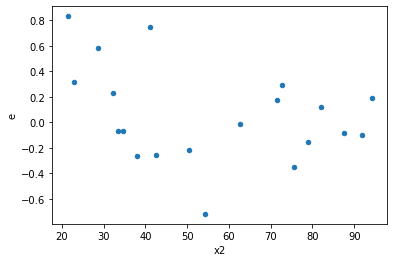

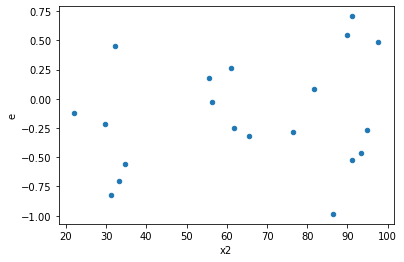

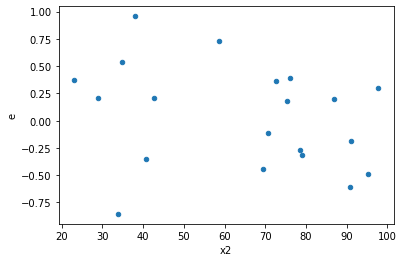

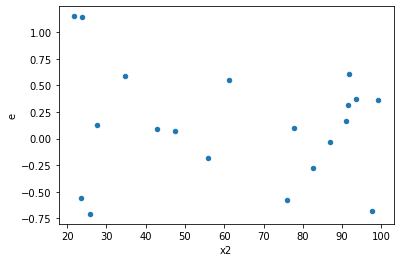

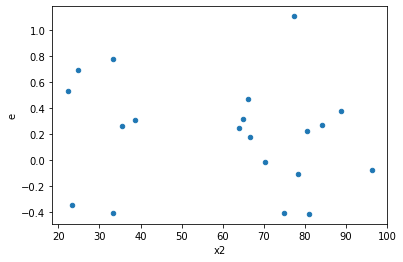

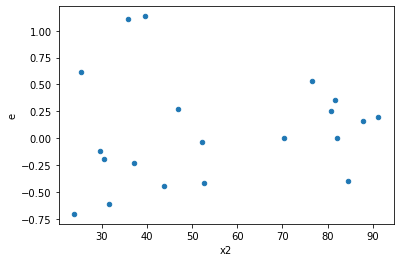

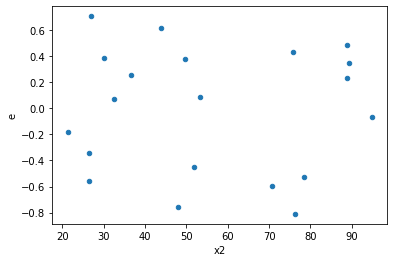

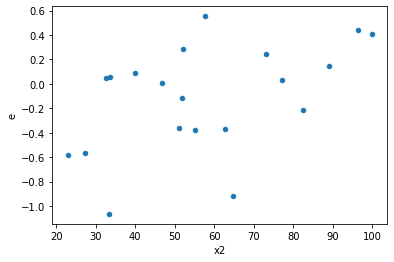

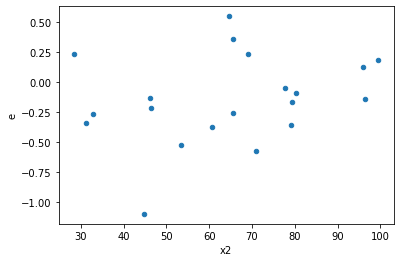

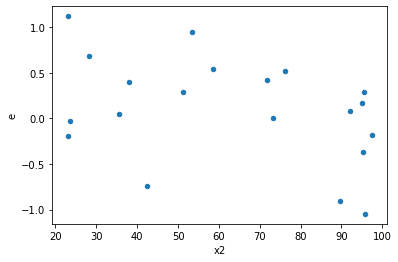

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,8.0,8.0,1.1586048126003141,3.5586096762057235,0.14482560157503926,0.44482620952571544,3.071461155265668,0.13315632374510278,0.9334218381274486,0.06657816187255139,Reject001=1 : Homoscedasticity
4.0,11.0,5.0,1.7459077721046208,1.3350097356077104,0.15871888837314735,0.26700194712154207,1.6822317107830402,0.5894725702723806,0.7052637148638097,0.2947362851361903,Reject001=1 : Homoscedasticity
6.0,6.0,10.0,1.1301207116149443,2.362797663603747,0.18835345193582406,0.2362797663603747,1.2544488244414025,0.7151144127497429,0.6424427936251286,0.35755720637487143,Reject001=1 : Homoscedasticity
8.0,3.0,13.0,0.1380278020389074,2.0567047698474963,0.04600926734630247,0.1582080592190382,3.438612878319449,0.0978433267658374,0.9510783366170813,0.0489216633829187,Reject001=1 : Homoscedasticity
9.0,6.0,10.0,1.122587112661434,1.8290311430692032,0.187097852110239,0.18290311430692033,0.9775799788399115,0.9746379391134927,0.5126810304432536,0.48731896955674636,Reject001=1 : Homoscedasticity
10.0,7.0,9.0,1.1889379460569391,2.4680751260178324,0.16984827800813415,0.27423056955753694,1.614561965381856,0.49333432919506115,0.7533328354024694,0.24666716459753057,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,0.24209357010152066,1.6449594039231434,0.030261696262690083,0.20561992549039293,6.794725705574661,0.013725228387185373,0.9931373858064073,0.0068626141935926865,Reject001=1 : Homoscedasticity
12.0,10.0,6.0,1.1819617770592736,1.3946631151221554,0.11819617770592736,0.23244385252035923,1.966593649912103,0.42134602107921526,0.7893269894603924,0.21067301053960763,Reject001=1 : Homoscedasticity
13.0,8.0,8.0,3.0700819163925295,3.7359091908814595,0.3837602395490662,0.46698864886018243,1.2168760614932725,0.7880341874455399,0.6059829062772301,0.39401709372276994,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.8409534746545417,0.2473440244208869,0.10511918433181772,0.030918003052610863,0.2941233158261154,0.10293743586359247,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,2.4595822733617574,1.3304510176363196,0.2732869192624175,0.1900644310909028,0.69547577177815,0.5986303707571204,Reject001=1 : Homoscedasticity
2.0,10.0,6.0,2.132966719094661,1.218631834225094,0.21329667190946608,0.2031053057041823,0.9522197598581871,0.899025882641667,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1.1586048126003141,3.5586096762057235,0.14482560157503926,0.44482620952571544,3.071461155265668,0.13315632374510278,Reject001=1 : Homoscedasticity
4.0,11.0,5.0,1.7459077721046208,1.3350097356077104,0.15871888837314735,0.26700194712154207,1.6822317107830402,0.5894725702723806,Reject001=1 : Homoscedasticity
5.0,10.0,6.0,4.250142389177532,0.511059203281514,0.42501423891775325,0.08517653388025233,0.2004086594772541,0.02593397785649806,Reject001=1 : Homoscedasticity
6.0,6.0,10.0,1.1301207116149443,2.362797663603747,0.18835345193582406,0.2362797663603747,1.2544488244414025,0.7151144127497429,Reject001=1 : Homoscedasticity
7.0,11.0,5.0,2.094939105492105,0.39423120378885923,0.19044900959019137,0.07884624075777184,0.4140018418968593,0.20707283637236137,Reject001=1 : Homoscedasticity
8.0,3.0,13.0,0.1380278020389074,2.0567047698474963,0.04600926734630247,0.1582080592190382,3.438612878319449,0.0978433267658374,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      957
Reject001=0 : Heteroscedasticity     43
Name: Result_test, dtype: int64